## read in data

In [1]:
# param
version = 'v20250521'
prop = 'change'
tgt = 'soc_change'
space = 'normal'
output_folder = './metric/'

In [2]:
# data
import pandas as pd
import numpy as np
cal = pd.read_parquet(f'./material/pair_cal_{version}.pq')
print(cal.shape)

# covariate
covs = cal.columns[12:-2].values.tolist()

(1000, 1000)


## feature selection

In [3]:
from model_fit import cfi_calc
print(cal.shape)
cal = cal.dropna(subset = covs+[tgt])
print(cal.shape)
cfi = cfi_calc(cal, tgt, prop, space, output_folder, version, covs) # produce

(1000, 1000)
(1000, 1000)
start bootstrap on different subset...
[11:37:36] 0 iteration, training size: 700
[11:37:40] 1 iteration, training size: 700
[11:37:44] 2 iteration, training size: 700
[11:37:48] 3 iteration, training size: 700
[11:37:53] 4 iteration, training size: 700
[11:37:58] 5 iteration, training size: 700
[11:38:02] 6 iteration, training size: 700
[11:38:07] 7 iteration, training size: 700
[11:38:11] 8 iteration, training size: 700
[11:38:16] 9 iteration, training size: 700
[11:38:20] 10 iteration, training size: 700
[11:38:26] 11 iteration, training size: 700
[11:38:30] 12 iteration, training size: 700
[11:38:35] 13 iteration, training size: 700
[11:38:40] 14 iteration, training size: 700
[11:38:45] 15 iteration, training size: 700
[11:38:49] 16 iteration, training size: 700
[11:38:54] 17 iteration, training size: 700
[11:38:58] 18 iteration, training size: 700
[11:39:02] 19 iteration, training size: 700


[14:11:54] processing 0.0 ...
[14:12:18] processing 0.0002 ...
[14:12:38] processing 0.0004 ...
[14:12:54] processing 0.0006000000000000001 ...
[14:13:04] processing 0.0008 ...
[14:13:13] processing 0.001 ...
[14:13:20] processing 0.0012000000000000001 ...
[14:13:26] processing 0.0014 ...
[14:13:30] processing 0.0016 ...
[14:13:34] processing 0.0018000000000000002 ...
[14:13:37] processing 0.002 ...
[14:13:41] processing 0.0022 ...
[14:13:43] processing 0.0024000000000000002 ...
[14:13:46] processing 0.0026000000000000003 ...
[14:13:48] processing 0.0028 ...
[14:13:50] processing 0.003 ...
[14:13:52] processing 0.0032 ...
[14:13:53] processing 0.0034000000000000002 ...
[14:13:55] processing 0.0036000000000000003 ...
[14:13:57] processing 0.0038 ...
[14:13:58] processing 0.004 ...
[14:14:00] processing 0.004200000000000001 ...
[14:14:02] processing 0.0044 ...
[14:14:03] processing 0.0046 ...
[14:14:04] processing 0.0048000000000000004 ...
[14:14:06] processing 0.005 ...
[14:14:07] proce

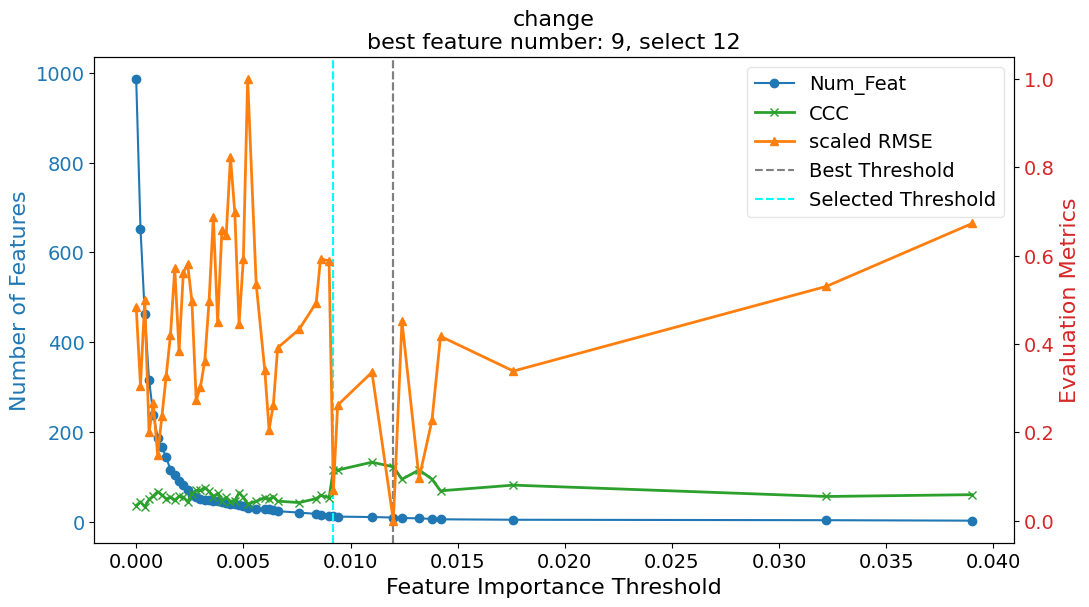

In [4]:
from model_fit import rscfi
cfi = pd.read_csv(f'./metric/feature_cfi_{prop}_{version}.csv')
cov = rscfi(cal, tgt, prop, space, output_folder, version, covs, cfi, [10,50], step_size=0.0002) # produce

## paramter fine-tuning

In [5]:
from model_fit import parameter_fine_tuning, read_features
models, model_names = parameter_fine_tuning(cal, cov, tgt, prop, './model/', version, strata_col=None)

[14:14:23] ----------------------rf------------------------
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 12
max_resources_: 1000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 135
n_resources: 12
Fitting 5 folds for each of 135 candidates, totalling 675 fits
----------
iter: 1
n_candidates: 45
n_resources: 36
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 2
n_candidates: 15
n_resources: 108
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 3
n_candidates: 5
n_resources: 324
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 2
n_resources: 972
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [6]:
models[0]


RandomForestRegressor(max_depth=10, max_features=0.7, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=64)

In [7]:
len(models[0].feature_names_in_)

12